In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [4]:
df = pd.read_csv('./FinalBalancedDataset.csv')
df.head()

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation


In [5]:
df = df[["Toxicity", "tweet"]]
df.head()

,Toxicity,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [6]:
x, y  = df["tweet"], df["Toxicity"]
X_train, X_test,y_train, y_test = train_test_split(x,y,
                                   test_size=0.20, 
                                   shuffle=True)

In [7]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


In [9]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)


RandomForestClassifier()

In [10]:
y_pred = rf_classifier.predict(X_test)

In [11]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9337386553881399
Precision: 0.9277493606138107
Recall: 0.9133445237096097
F1-score: 0.9204905899767393


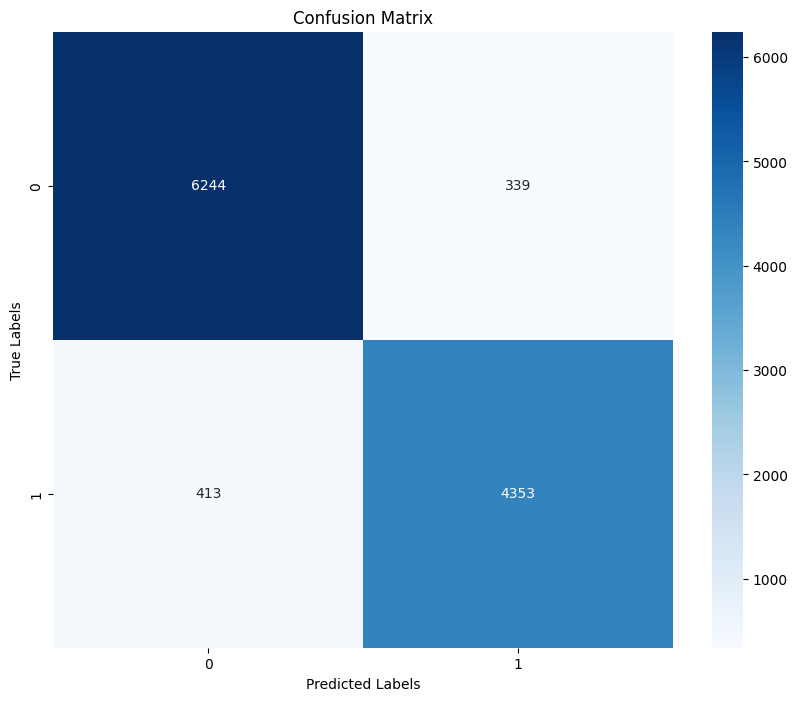

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [18]:
labels = np.array(df)
indices = np.where(labels == 0)[0]
num_instances = len(indices)
print("not toxic comments ",num_instances)
labels = np.array(df)
indices = np.where(labels == 1)[0]
num_instances = len(indices)
print("toxic comments ",num_instances)



not toxic comments  32592
toxic comments  24153


In [ ]:
input_tweet = "you are"
input_vector = vectorizer.transform([input_tweet])
prediction = rf_classifier.predict(input_vector)
print(prediction)

[1]


In [ ]:
import pickle
pickle.dump(rf_classifier, open('random_forest_model.pkl', 'wb'))

In [ ]:
pickle.dump(vectorizer, open('vectorizer.pkl','wb'))